<a href="https://colab.research.google.com/github/MaicolLojano/Mineria-de-Datos/blob/main/UNIDAD2/Evaluaci%C3%B3n_de_modelos_Maicol_Lojano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

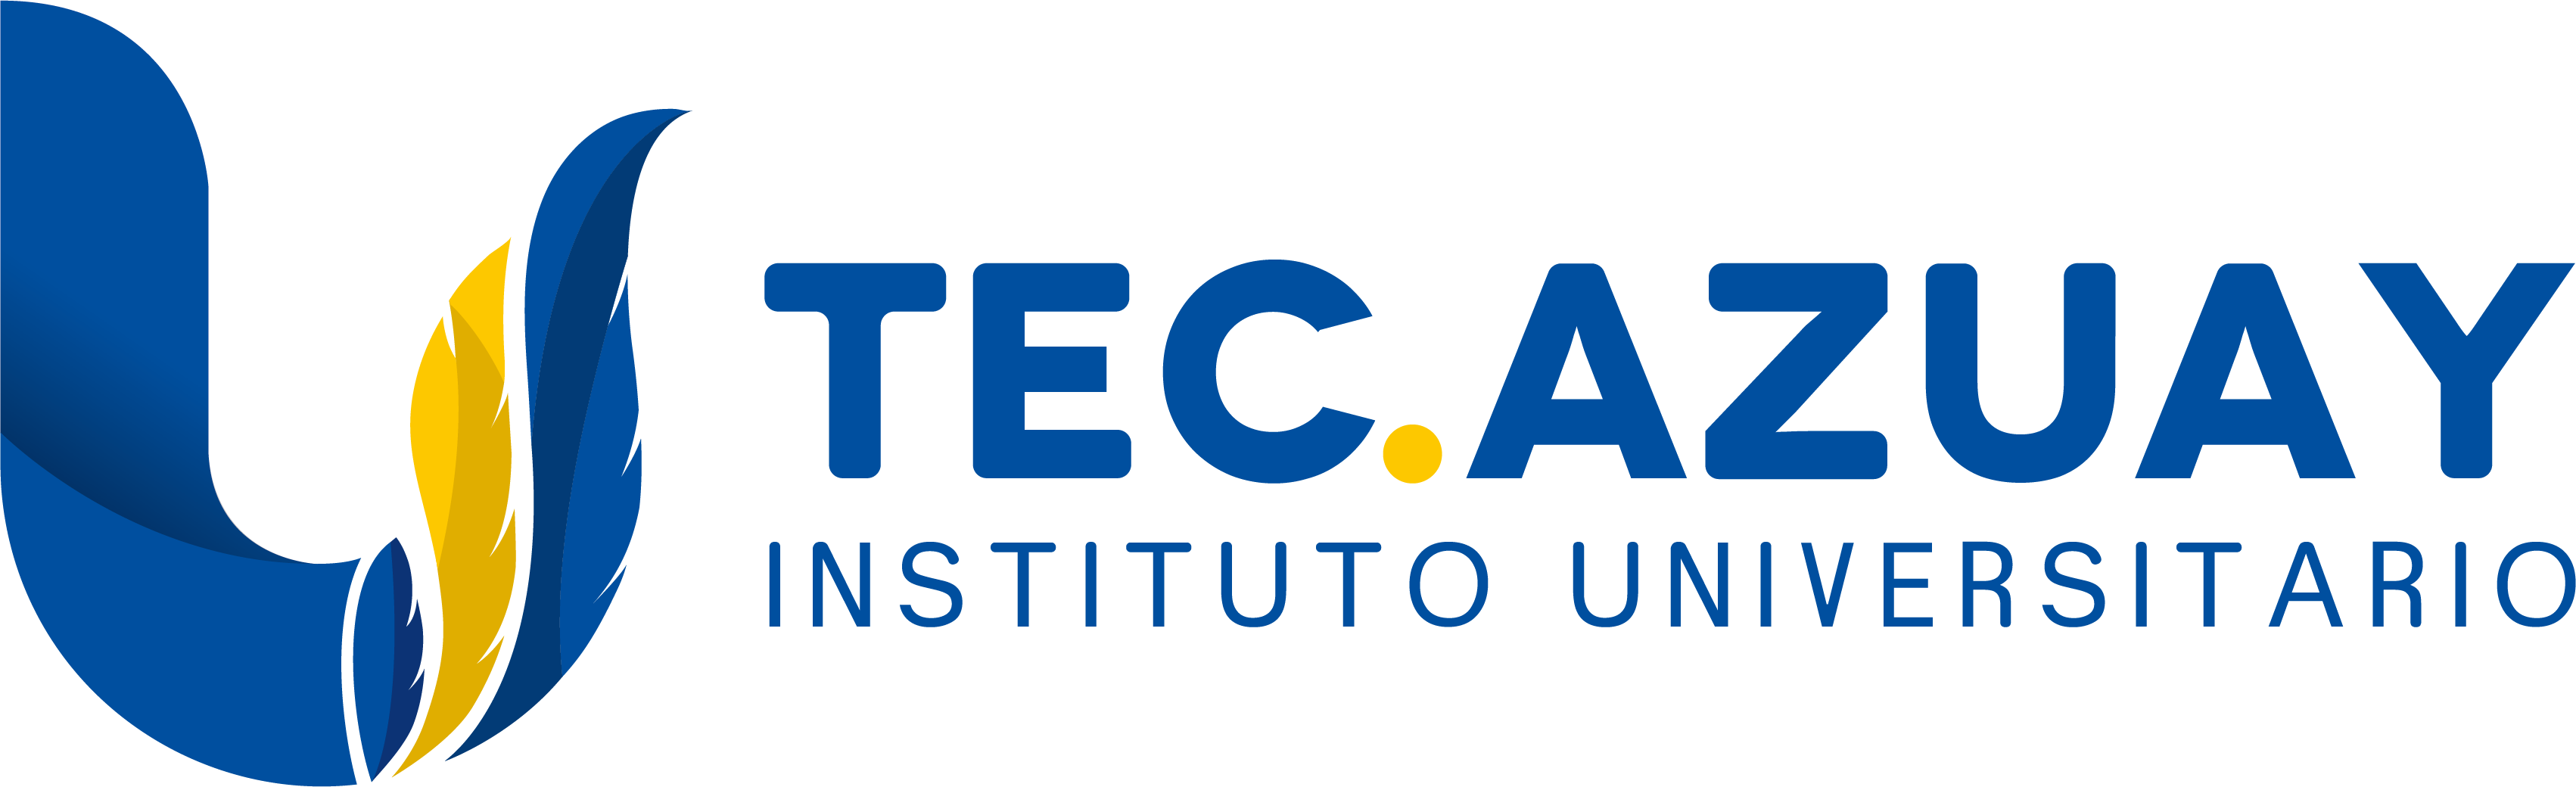

**Nombre:** Maicol Lojano

**Asignatura:** arcos de Referencia

**Docente:** Ing.Veronica Chimbo

# EVALUACIÓN DE MODELOS
La evaluación de modelos en minería de datos es crucial para entender cómo se comporta un modelo y qué tan bien generaliza a datos no vistos.

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Datos de ejemplo para cada DataFrame
df_estudiantes = pd.DataFrame({
    'cedula': [1401416993, 1401416993, 1401416993, 1401416993, 107416927, 107416927, 106422496, 106422496, 106422496, 106422496, 106422496, 105467815,
               105467815, 105467815, 105467815, 105467815, 105467815, 106605017, 106605017, 106605017, 302365440, 302365440, 302365440, 302365440,
               107973687, 107973687, 107973687, 107973687, 107973687, 107973687, 107957144, 107957144, 107915126, 107915126, 107915126, 150564078, 150564078, 150564078],
    'nombre': ['Maicol', 'Maicol', 'Maicol', 'Maicol', 'Jose', 'Jose','Paul', 'Paul', 'Paul', 'Paul', 'Paul', 'Ariel', 'Ariel', 'Ariel', 'Ariel', 'Ariel',
               'Ariel', 'Carlos', 'Carlos', 'Carlos', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor',
               'Paula', 'Paula', 'Danny', 'Danny', 'Danny', 'Dany', 'Dany', 'Dany'],
    'asignatura': ['Minería de Datos', 'Aprendizaje  Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia'],

    'nota_final': [9.24, 9.06, 9.32, 8.85, 9.71, 9.08, 9.17, 9.28, 9.15, 9.13, 8.25, 6.08, 9.28, 8.35, 6.17, 8.91, 10, 9.40, 8.71, 8.05, 9.77, 9.17, 7.64, 8.55, 9.11, 8.63, 8.68, 8.79, 8.45, 8.40, 9.24, 9.08, 8.74,
                   8.39, 8.85, 8.53, 5.64, 5.91]
})

df_diagnostico = pd.DataFrame({
    'cedula': [1401416993, 1401416993, 1401416993, 1401416993, 107416927, 107416927, 106422496, 106422496, 106422496, 106422496, 106422496, 105467815,
               105467815, 105467815, 105467815, 105467815, 105467815, 106605017, 106605017, 106605017, 302365440, 302365440, 302365440, 302365440,
               107973687, 107973687, 107973687, 107973687, 107973687, 107973687, 107957144, 107957144, 107915126, 107915126, 107915126, 150564078, 150564078, 150564078],
    'nombre': ['Maicol', 'Maicol', 'Maicol', 'Maicol', 'Jose', 'Jose','Paul', 'Paul', 'Paul', 'Paul', 'Paul', 'Ariel', 'Ariel', 'Ariel', 'Ariel', 'Ariel',
               'Ariel', 'Carlos', 'Carlos', 'Carlos', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor',
               'Paula', 'Paula', 'Danny', 'Danny', 'Danny', 'Dany', 'Dany', 'Dany'],
    'asignatura': ['Minería de Datos', 'Aprendizaje  Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia'],
    'nota_diagnostico': [5.42, 8, 5.07, 8, 4.42, 0, 5, 6.4, 9, 6.53, 8, 3, 6.27, 9, 7, 10, 10, 5.43, 6, 8, 0, 0, 0, 0, 0, 5.22, 0, 5.5, 8, 10, 5.55, 0,
                         4.89, 6, 10, 3.89, 0, 0 ]
})

df_interciclo = pd.DataFrame({
    'cedula': [1401416993, 1401416993, 1401416993, 1401416993, 107416927, 107416927, 106422496, 106422496, 106422496, 106422496, 106422496, 105467815,
               105467815, 105467815, 105467815, 105467815, 105467815, 106605017, 106605017, 106605017, 302365440, 302365440, 302365440, 302365440,
               107973687, 107973687, 107973687, 107973687, 107973687, 107973687, 107957144, 107957144, 107915126, 107915126, 107915126, 150564078, 150564078, 150564078],
    'nombre': ['Maicol', 'Maicol', 'Maicol', 'Maicol', 'Jose', 'Jose','Paul', 'Paul', 'Paul', 'Paul', 'Paul', 'Ariel', 'Ariel', 'Ariel', 'Ariel', 'Ariel',
               'Ariel', 'Carlos', 'Carlos', 'Carlos', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor',
               'Paula', 'Paula', 'Danny', 'Danny', 'Danny', 'Dany', 'Dany', 'Dany'],
    'asignatura': ['Minería de Datos', 'Aprendizaje  Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia'],
    'asistencia ': [95.04, 96.03, 97.02, 96.03, 98.01, 94.05, 95.58, 92.07, 96.03, 100.00, 93.06, 88.23, 94.05, 89.10, 98.01, 92.07, 85.29, 97.02, 95.04, 100.00,
                   89.70,  93.06, 87.12, 84.15, 86.76, 96.03, 98.01, 98.01, 89.10, 79.41, 99.00, 93.06, 98.01, 86.13, 80.19, 89.10, 92.07, 97.02],
    'nota_interciclo': [9.24, 9.06, 9.32, 8.85, 9.71, 9.08, 9.17, 9.28, 9.15, 9.13, 8.25, 6.08, 9.28, 8.35, 6.17, 8.91, 10, 9.40, 8.71, 8.05, 9.77, 9.17, 7.64, 8.55, 9.11, 8.63, 8.68, 8.79, 8.45, 8.40, 9.24, 9.08, 8.74,
                   8.39, 8.85, 8.53, 5.64, 5.91]
})

df_final = pd.DataFrame({
    'cedula': [1401416993, 1401416993, 1401416993, 1401416993, 107416927, 107416927, 106422496, 106422496, 106422496, 106422496, 106422496, 105467815,
               105467815, 105467815, 105467815, 105467815, 105467815, 106605017, 106605017, 106605017, 302365440, 302365440, 302365440, 302365440,
               107973687, 107973687, 107973687, 107973687, 107973687, 107973687, 107957144, 107957144, 107915126, 107915126, 107915126, 150564078, 150564078, 150564078],
    'nombre': ['Maicol', 'Maicol', 'Maicol', 'Maicol', 'Jose', 'Jose','Paul', 'Paul', 'Paul', 'Paul', 'Paul', 'Ariel', 'Ariel', 'Ariel', 'Ariel', 'Ariel',
               'Ariel', 'Carlos', 'Carlos', 'Carlos', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Jhonatan', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor', 'Victor',
               'Paula', 'Paula', 'Danny', 'Danny', 'Danny', 'Dany', 'Dany', 'Dany'],
    'asignatura': ['Minería de Datos', 'Aprendizaje  Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Emprendimiento', 'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia', 'Inteligencia de negocios', 'Etica Profecional',
                   'Minería de Datos', 'Aprendizaje Profundo',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Inteligencia de negocios',
                   'Minería de Datos', 'Aprendizaje Profundo', 'Marcos de Referencia'],
    'asistencia': [95.04, 96.03, 97.02, 96.03, 98.01, 94.05, 95.58, 92.07, 96.03, 100.00, 93.06, 88.23, 94.05, 89.10, 98.01, 92.07, 85.29, 97.02, 95.04, 100.00,
                   89.70,  93.06, 87.12, 84.15, 86.76, 96.03, 98.01, 98.01, 89.10, 79.41, 99.00, 93.06, 98.01, 86.13, 80.19, 89.10, 92.07, 97.02],
    'nota_final2': [9.24, 9.06, 9.32, 8.85, 9.71, 9.08, 9.17, 9.28, 9.15, 9.13, 8.25, 6.08, 9.28, 8.35, 6.17, 8.91, 10, 9.40, 8.71, 8.05, 9.77, 9.17, 7.64, 8.55, 9.11, 8.63, 8.68, 8.79, 8.45, 8.40, 9.24, 9.08, 8.74,
                   8.39, 8.85, 8.53, 5.64, 5.91]
})

In [ ]:
# Realiza las uniones
df_combined = df_estudiantes \
    .merge(df_diagnostico, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_interciclo, on=['cedula', 'nombre', 'asignatura'], how='left') \
    .merge(df_final, on=['cedula', 'nombre', 'asignatura'], how='left')

In [ ]:
# Mostrar el DataFrame combinado
print("DataFrame combinado:")
print(df_combined)

DataFrame combinado:
        cedula    nombre                asignatura  nota_final  \
0   1401416993    Maicol          Minería de Datos        9.24   
1   1401416993    Maicol     Aprendizaje  Profundo        9.06   
2   1401416993    Maicol      Marcos de Referencia        9.32   
3   1401416993    Maicol  Inteligencia de negocios        8.85   
4    107416927      Jose          Minería de Datos        9.71   
5    107416927      Jose      Aprendizaje Profundo        9.08   
6    106422496      Paul            Emprendimiento        9.17   
7    106422496      Paul          Minería de Datos        9.28   
8    106422496      Paul      Aprendizaje Profundo        9.15   
9    106422496      Paul      Marcos de Referencia        9.13   
10   106422496      Paul  Inteligencia de negocios        8.25   
11   105467815     Ariel            Emprendimiento        6.08   
12   105467815     Ariel          Minería de Datos        9.28   
13   105467815     Ariel      Aprendizaje Profundo     

In [ ]:
# Preparar los datos para el modelo
X = df_combined[['nota_final', 'nota_diagnostico', 'nota_interciclo']]
y = df_combined['nota_final2']

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
# Crear un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Realizar predicciones
y_pred = model.predict(X_test)
y_pred

array([ 7.64,  8.4 , 10.  ,  8.91,  6.08,  9.77,  8.68,  8.25,  8.63,
        9.32,  9.08,  8.39])

# **Error Cuadrático Medio (MSE)**
Descripción: Mide el promedio de los cuadrados de los errores (diferencias entre valores predichos y reales). Penaliza los errores grandes más severamente.

In [ ]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")


Evaluación del modelo de regresión:
Error Cuadrático Medio (MSE): 0.00


# **Interpretación:**
Un MSE más bajo indica que el modelo está haciendo predicciones más cercanas a los valores reales.

# **Error Absoluto Medio (MAE)**
**Descripción**: Mide el promedio de las diferencias absolutas entre valores predichos y reales. Es menos sensible a los errores grandes en comparación con el MSE.

In [ ]:
# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
print("\nEvaluación del modelo de regresión:")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")


Evaluación del modelo de regresión:
Error Absoluto Medio (MAE): 0.00


# **Interpretación:**
Un MAE más bajo indica que el modelo está haciendo predicciones más precisas en promedio.

# **Coeficiente de Determinación (R²)**
**Descripción:** Mide la proporción de la varianza en la variable dependiente que es explicada por el modelo. Varía entre 0 (sin explicación) y 1 (explicación perfecta).

In [ ]:
# Evaluar el modelo
r2 = r2_score(y_test, y_pred)

In [ ]:
print("\nEvaluación del modelo de regresión:")
print(f"Coeficiente de Determinación (R²): {r2:.2f}")


Evaluación del modelo de regresión:
Coeficiente de Determinación (R²): 1.00


# **Interpretación:**
Un R² más alto indica un mejor ajuste del modelo a los datos. Un R² negativo sugiere que el modelo es peor que un modelo simple que predice la media de los valores.

#**Visualización de Predicciones vs. Valores Reales**
**Descripción:** Un gráfico de dispersión para comparar las predicciones del modelo con los valores reales. La línea de referencia ayuda a visualizar cuán cerca están las predicciones de los valores reales.

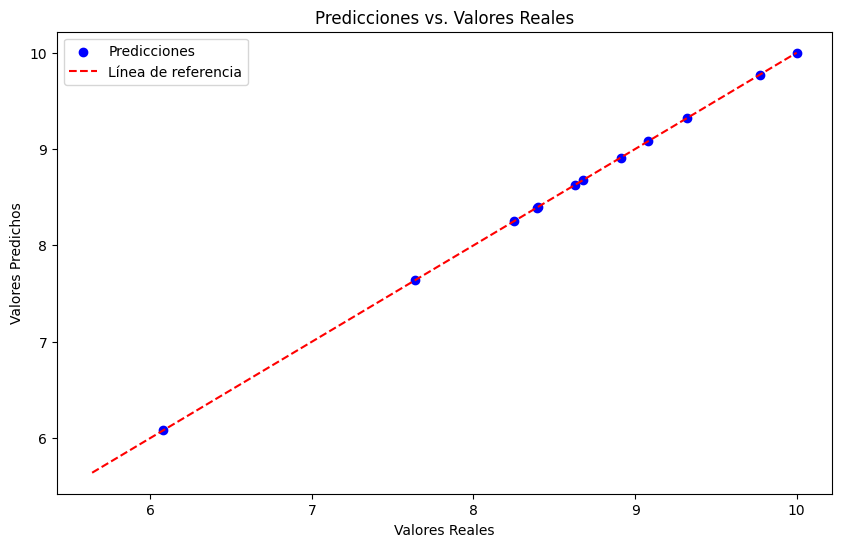

In [ ]:
# Visualizar las predicciones vs. valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicciones')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Línea de referencia')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Predicciones vs. Valores Reales')
plt.legend()
plt.show()

## **Distribución de Errores**
**Descripción:** Un histograma que muestra la distribución de los errores (diferencias entre valores reales y predicciones). La curva KDE (Kernel Density Estimate) ayuda a visualizar la forma de la distribución.

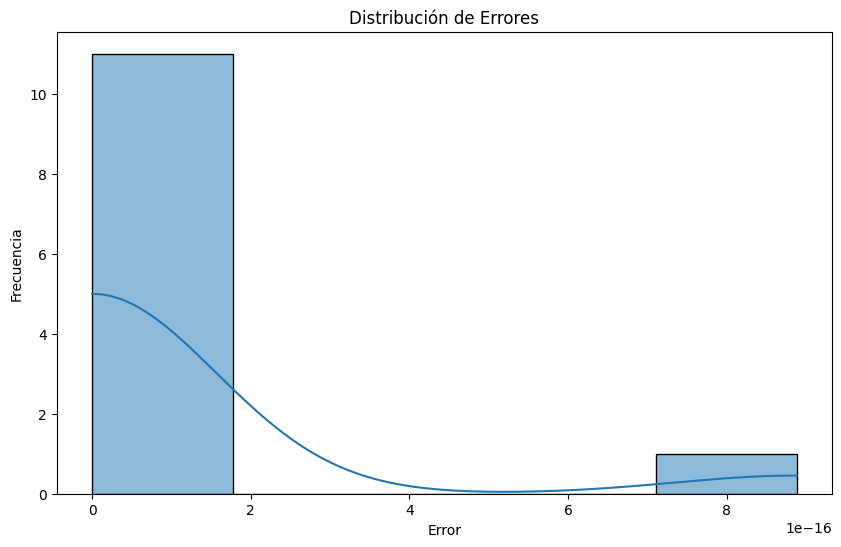

In [ ]:
# Visualizar la distribución de errores
errors = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(errors, kde=True)
plt.xlabel('Error')
plt.ylabel('Frecuencia')
plt.title('Distribución de Errores')
plt.show()

## **Autoevaluación**

**1. ¿Qué métrica mide el promedio de los cuadrados de los errores en las predicciones del modelo?**

A) Error Absoluto Medio (MAE)

**B) Error Cuadrático Medio (MSE)**

C) Coeficiente de Determinación (R²)

D) Error de Predicción

**2. ¿Cuál es la interpretación de un valor bajo de MAE?**

A) El modelo es poco preciso en promedio.

B) El modelo tiene errores grandes en las predicciones.

**C) El modelo es preciso en promedio.**

D) El modelo explica muy bien la varianza en los datos.

**3. ¿Qué indica un valor de R² igual a 1?**

**A) El modelo no explica nada de la varianza en los datos.**

B) El modelo tiene errores muy altos en las predicciones.

C) El modelo explica perfectamente la varianza en los datos.

D) El modelo tiene errores bajos, pero no explica bien los datos.

**4. ¿Cuál es el propósito de dividir los datos en conjuntos de entrenamiento y prueba?**

A) Para evaluar el rendimiento del modelo en datos no vistos.

B) Para aumentar el tamaño del conjunto de datos.

**C) Para realizar una normalización de datos.**

D) Para combinar datos de diferentes fuentes.

**5. En la visualización de 'Predicciones vs. Valores Reales', ¿qué representa la línea de referencia?**

A) La línea de tendencia de los datos.

B) La media de los valores reales.

**C) La línea donde las predicciones serían perfectas.**

D) La desviación estándar de los errores.

**6. ¿Qué información proporciona el histograma de errores?**

A) La distribución de los valores reales en el conjunto de datos.

B) La relación entre las predicciones y los valores reales.

**C) La distribución de las diferencias entre valores reales y predicciones.**

D) La precisión del modelo en datos de entrenamiento.

**7. ¿Qué métrica es menos sensible a errores grandes y proporciona un promedio simple de las diferencias absolutas?**

A) Error Cuadrático Medio (MSE)

**B) Error Absoluto Medio (MAE)**

C) Coeficiente de Determinación (R²)

D) Error de Predicción

**8. ¿Cuál es la función principal de la biblioteca sklearn en el notebook?**

A) Crear gráficos y visualizaciones.

B) Preprocesar los datos.

**C) Construir y evaluar modelos predictivos.**

D) Leer y escribir archivos CSV.

**9. ¿Qué función se utiliza para calcular el Error Cuadrático Medio en Python?**

A) mean_absolute_error()

B) r2_score()

**C) mean_squared_error()**

D) accuracy_score()

**10. ¿Qué se está intentando predecir en el modelo de regresión lineal?**

A) nota_final

B) nota_diagnostico

C) nota_interciclo

**D) nota_final2**